# Annotated follow-along guide: Work with probability distributions in Python

This notebook contains the code used in the following instructional video: [Work with probability distributions in Python](https://www.coursera.org/learn/the-power-of-statistics/lecture/loR42/work-with-probability-distributions-in-python).


## Introduction

# 📊 Introducción al uso de la distribución normal y puntuaciones Z

A lo largo de este cuaderno utilizaremos la **distribución normal** para modelar nuestros datos.  
También calcularemos **puntuaciones Z (z-scores)** para identificar posibles **valores atípicos (outliers)** en los conjuntos de datos.

---

## 🎯 Antes de comenzar
- Mira el video instructivo asociado.  
- Completa la pregunta incluida en el video.  

---

## 🛠️ Contenido del cuaderno
- Todo el **código** que implementaremos.  
- Las **instrucciones relacionadas** para cada paso.  
- Ejemplos prácticos de cómo aplicar la distribución normal y las puntuaciones Z en análisis de datos.


# 📘 Overview

En este cuaderno continuaremos con el escenario anterior en el que eres un **profesional de datos** trabajando para el **Departamento de Educación** de una nación grande.  

---

## 📊 Contexto
- Estamos analizando datos sobre la **tasa de alfabetización** en cada distrito.  
- Ya hemos calculado **estadísticos descriptivos** para resumir la información.  

---

## 🎯 Objetivo de esta sección
- Determinar si los datos de la tasa de alfabetización por distrito se ajustan a un **tipo específico de distribución de probabilidad**.  
- Esto nos permitirá evaluar si el modelo de distribución normal es adecuado para representar el comportamiento de los datos.  


# ⚙️ Preparación: Librerías y extensiones

Antes de comenzar, necesitamos importar todas las librerías y extensiones requeridas.  

---

## 📚 Librerías principales
- **pandas** → operaciones con datos tabulares.  
- **numpy** → cálculos numéricos y manejo de arrays.  
- **matplotlib** → visualización y gráficos.  
- **SciPy stats** → módulo especializado en estadística.  

---

## 🔎 Sobre SciPy
- **SciPy** es un software *open-source* para resolver problemas matemáticos, científicos, de ingeniería y técnicos.  
- Permite manipular y visualizar datos con una amplia gama de comandos en Python.  
- El submódulo **`scipy.stats`** está diseñado específicamente para análisis estadístico.  

---

## 📌 Nota importante
- **statsmodels** solía formar parte del módulo `stats` de SciPy, pero luego se liberó como paquete independiente.  
- Es una librería estadística esencial en Python, aunque **no se utiliza en este laboratorio**.  

---

## 🛠️ Código inicial

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

# 📝 Nota sobre valores faltantes

**NOTE:** Puedes usar el método `dropna()` para eliminar valores faltantes (*missing values*) en tus datos.  

---

## 📊 Ejemplo en pandas

```python
import pandas as pd

# Crear un DataFrame con valores faltantes
df = pd.DataFrame({
    "A": [1, 2, None, 4],
    "B": [5, None, 7, 8]
})

# Eliminar filas con valores faltantes
df_clean = df.dropna()

print(df_clean)


# 📊 Visualización inicial: Histograma

El primer paso para intentar modelar tus datos con una distribución de probabilidad es **graficar un histograma**.  
Esto te permitirá **visualizar la forma de los datos** y evaluar si se asemeja a la forma de una distribución específica (por ejemplo, la normal).
En el contexto de ese notebook, OVERALL_LI es simplemente el nombre de la columna del dataset que contiene la tasa de alfabetización general (Overall Literacy Rate) de cada distrito.

OVERALL_LI → Overall Literacy Index / Literacy Rate.

Es la variable que estamos analizando para ver si se ajusta a una distribución normal.

Cada fila representa un distrito, y el valor en esa columna indica el porcentaje de población alfabetizada.

📌 En resumen: OVERALL_LI es la columna con los datos de alfabetización por distrito, la que usamos para graficar el histograma y calcular z-scores.

---

## 🎯 Objetivo
- Representar la **tasa de alfabetización por distrito**.  
- Identificar si la distribución de los datos se aproxima a una **distribución normal**.  

---

## 🛠️ Código en Python

```python
import matplotlib.pyplot as plt

# Graficar histograma de la columna OVERALL_LI
plt.hist(df["OVERALL_LI"], bins=20, edgecolor="black")
plt.title("Histograma de la tasa de alfabetización por distrito")
plt.xlabel("Tasa de alfabetización (%)")
plt.ylabel("Frecuencia")
plt.show()


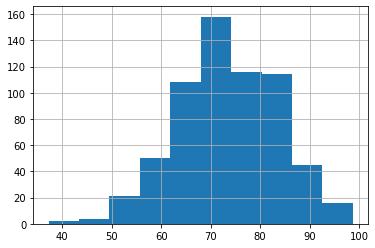

In [3]:
education_districtwise['OVERALL_LI'].hist()

# 📈 Distribución normal

El histograma muestra que la distribución de los datos de la tasa de alfabetización tiene forma de **campana** y es **simétrica respecto a la media**.  

- La media de la tasa de alfabetización, que está alrededor del **73%**, se ubica en el centro del gráfico.  
- Recuerda que la **distribución normal** es una distribución de probabilidad continua, con forma de campana y simétrica a ambos lados de la media.  
- La forma del histograma sugiere que la **distribución normal podría ser una buena opción de modelado** para estos datos.  

---

## 📌 Interpretación
- Si los datos se ajustan a una distribución normal, podemos aplicar herramientas estadísticas como **puntuaciones Z**, pruebas de hipótesis y detección de valores atípicos.  
- Este paso es clave para validar si el modelo probabilístico es adecuado antes de avanzar en el análisis.  


# 📐 Regla empírica

Dado que la distribución normal parece ajustarse bien a los datos de la tasa de alfabetización por distrito, podemos esperar que la **regla empírica** se aplique de manera razonable.  

---

## 📊 Recordatorio de la regla empírica
En una distribución normal:

- **68%** de los valores caen dentro de ±1 desviación estándar (SD) de la media.  
- **95%** de los valores caen dentro de ±2 desviaciones estándar de la media.  
- **99.7%** de los valores caen dentro de ±3 desviaciones estándar de la media.  

**Nota:** *SD* significa *standard deviation* (desviación estándar).  

---

## 📌 Aplicación a los datos de alfabetización
- Aproximadamente **68%** de las tasas de alfabetización distritales estarán dentro de ±1 SD de la media.  
- Aproximadamente **95%** estarán dentro de ±2 SD de la media.  
- Aproximadamente **99.7%** estarán dentro de ±3 SD de la media.  

---

## 🎯 Interpretación
La regla empírica nos da una forma rápida de estimar la **distribución de los valores** alrededor de la media.  
Esto es útil para identificar valores atípicos y evaluar si los datos siguen un patrón normal.  




# 🛠️ Definir variables para media y desviación estándar

El siguiente paso es crear dos nuevas variables para almacenar los valores de la **media** y la **desviación estándar** de la tasa de alfabetización por distrito:

- `mean_overall_li` → contendrá la **media** de la columna `OVERALL_LI`.  
- `std_overall_li` → contendrá la **desviación estándar** de la columna `OVERALL_LI`.  
mean_overall_li nos da el valor promedio de la tasa de alfabetización en todos los distritos.

std_overall_li indica cuánto se dispersan las tasas de alfabetización respecto a la media.

Estos valores son esenciales para aplicar la regla empírica y calcular puntuaciones Z.

---

## 📌 Código en Python

```python
# Calcular media y desviación estándar de la tasa de alfabetización
mean_overall_li = df["OVERALL_LI"].mean()
std_overall_li = df["OVERALL_LI"].std()

print("Media:", mean_overall_li)
print("Desviación estándar:", std_overall_li)


In [4]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444797

# 📊 Media de la tasa de alfabetización

La **media de la tasa de alfabetización distrital** es aproximadamente **73.4%**.  

---

## 📌 Interpretación
- Este valor representa el **promedio general** de alfabetización en todos los distritos analizados.  
- Se ubica en el **centro de la distribución normal** observada en el histograma.  
- Servirá como referencia para aplicar la **regla empírica** y calcular **puntuaciones Z**.  

---

## 🛠️ Código en Python

```python
print("Media de la tasa de alfabetización:", mean_overall_li)
# Resultado esperado: ~73.4%


In [ ]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

La desviación estándar es de alrededor del 10%.

# 📐 Cálculo del porcentaje dentro de ±1 SD

Ahora vamos a calcular el porcentaje de tasas de alfabetización distritales que caen dentro de **±1 desviación estándar (SD)** de la media.  

---

## 🛠️ Pasos a seguir
1. Definir dos nuevas variables:  
   - `lower_limit` → límite inferior = media − (1 × SD).  
   - `upper_limit` → límite superior = media + (1 × SD).  

2. Usar las variables `mean_overall_li` y `std_overall_li` para calcular los límites.  

3. Verificar si cada valor de la columna `OVERALL_LI` está entre el límite inferior y superior.  
   - Operadores relacionales: `>=` y `<=`.  
   - Operador lógico: `&` (AND bitwise).  

4. Usar `.mean()` para calcular el porcentaje de valores dentro de ±1 SD.  

---

## 📌 Código en Python

```python
# Definir límites
lower_limit = mean_overall_li - std_overall_li
upper_limit = mean_overall_li + std_overall_li

# Calcular porcentaje de valores dentro de ±1 SD
within_1sd = ((df["OVERALL_LI"] >= lower_limit) & (df["OVERALL_LI"] <= upper_limit)).mean()

print("Porcentaje dentro de ±1 SD:", within_1sd * 100, "%")



In [6]:
lower_limit = mean_overall_li - 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

Aproximadamente 66.4% de las tasas de alfabetización distritales caen dentro de ±1 desviación estándar de la media, un valor muy cercano al 68% esperado según la regla empírica.

# 📐 Porcentaje dentro de ±2 SD

Ahora vamos a calcular el porcentaje de tasas de alfabetización distritales que caen dentro de **±2 desviaciones estándar (SD)** de la media.  

---

## 🛠️ Pasos a seguir
1. Definir los límites:  
   - `lower_limit_2sd` → media − (2 × SD).  
   - `upper_limit_2sd` → media + (2 × SD).  

2. Verificar si cada valor de la columna `OVERALL_LI` está entre esos límites.  
   - Operadores relacionales: `>=` y `<=`.  
   - Operador lógico: `&` (AND bitwise).  

3. Usar `.mean()` para calcular la proporción de valores dentro de ±2 SD.  

---

## 📌 Código en Python

```python
# Definir límites para ±2 SD
lower_limit_2sd = mean_overall_li - (2 * std_overall_li)
upper_limit_2sd = mean_overall_li + (2 * std_overall_li)

# Calcular porcentaje de valores dentro de ±2 SD
within_2sd = ((df["OVERALL_LI"] >= lower_limit_2sd) & (df["OVERALL_LI"] <= upper_limit_2sd)).mean()

print("Porcentaje dentro de ±2 SD:", within_2sd * 100, "%")


In [7]:
lower_limit = mean_overall_li - 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

Aproximadamente 95.4% de las tasas de alfabetización distritales caen dentro de ±2 desviaciones estándar de la media, lo cual coincide muy bien con el 95% esperado según la regla empírica.

# 📐 Porcentaje dentro de ±3 SD

Finalmente, vamos a calcular el porcentaje de tasas de alfabetización distritales que caen dentro de **±3 desviaciones estándar (SD)** de la media.  

---

## 🛠️ Pasos a seguir
1. Definir los límites:  
   - `lower_limit_3sd` → media − (3 × SD).  
   - `upper_limit_3sd` → media + (3 × SD).  

2. Verificar si cada valor de la columna `OVERALL_LI` está entre esos límites.  
   - Operadores relacionales: `>=` y `<=`.  
   - Operador lógico: `&` (AND bitwise).  

3. Usar `.mean()` para calcular la proporción de valores dentro de ±3 SD.  

---

## 📌 Código en Python

```python
# Definir límites para ±3 SD
lower_limit_3sd = mean_overall_li - (3 * std_overall_li)
upper_limit_3sd = mean_overall_li + (3 * std_overall_li)

# Calcular porcentaje de valores dentro de ±3 SD
within_3sd = ((df["OVERALL_LI"] >= lower_limit_3sd) & (df["OVERALL_LI"] <= upper_limit_3sd)).mean()

print("Porcentaje dentro de ±3 SD:", within_3sd * 100, "%")


In [8]:
lower_limit = mean_overall_li - 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

Aproximadamente 99.7% de las tasas de alfabetización distritales caen dentro de ±3 desviaciones estándar de la media, lo cual coincide casi exactamente con el 99.7% esperado según la regla empírica.

# ✅ Comparación con la regla empírica

Nuestros valores calculados concuerdan bastante bien con la **regla empírica**:

- **Resultados obtenidos:** 66.4%, 95.4%, 99.6%  
- **Valores esperados según la regla empírica:** ~68%, 95%, 99.7%  

---

## 📌 Interpretación
- La proporción de valores dentro de ±1, ±2 y ±3 SD se aproxima mucho a lo esperado.  
- Esto confirma que la **distribución normal es un buen modelo** para los datos de la tasa de alfabetización distrital.  



# 📊 Importancia de la distribución normal

Saber que tus datos siguen una **distribución normal** es muy útil para el análisis, porque:

- Muchos **tests estadísticos** y **modelos de machine learning** asumen normalidad en los datos.  
- Cuando los datos siguen una distribución normal, puedes usar **puntuaciones Z (z-scores)** para:  
  - Medir la **posición relativa** de cada valor respecto a la media.  
  - Identificar **valores atípicos (outliers)** en el conjunto de datos.  

---

## 🎯 Interpretación
La normalidad de los datos no solo valida el uso de pruebas estadísticas clásicas, sino que también facilita la detección de patrones y anomalías mediante herramientas como los **z-scores**.  


# 🔎 Cálculo de z-scores para detectar outliers

Recuerda que un **z-score** mide cuántas desviaciones estándar por debajo o por encima de la media se encuentra un dato.  

- Un z-score indica la **posición relativa** de un valor dentro de la distribución.  
- Los profesionales de datos suelen usar z-scores para **detección de valores atípicos (outliers)**.  
- Generalmente, se consideran outliers las observaciones con:  
  - z-score < -3  
  - z-score > +3  

En otras palabras, son valores que se encuentran a más de **±3 desviaciones estándar de la media**.  

---

## 📌 Código en Python

```python
from scipy.stats import zscore

# Calcular z-scores para la columna OVERALL_LI
education_districtwise["zscore"] = zscore(education_districtwise["OVERALL_LI"])

# Identificar outliers
outliers = education_districtwise[(education_districtwise["zscore"] < -3) | (education_districtwise["zscore"] > 3)]

print(outliers)


# 🔎 Crear columna de z-scores para detectar outliers

Para identificar outliers en los datos:

1. Crearemos una nueva columna llamada `Z_SCORE` que contendrá los **z-scores** de cada tasa de alfabetización distrital.  
2. Recordemos que la columna `OVERALL_LI` lista todas las tasas de alfabetización por distrito.  
3. Calcularemos los z-scores utilizando la función [`scipy.stats.zscore()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html).  

---

## 📌 Código en Python

```python
from scipy.stats import zscore

# Crear nueva columna con z-scores
education_districtwise["Z_SCORE"] = zscore(education_districtwise["OVERALL_LI"])

# Mostrar primeras filas para verificar
print(education_districtwise.head())


In [9]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


# 🚨 Identificación de outliers con z-scores

Ahora que hemos calculado los **z-scores** para nuestro dataset, vamos a identificar los distritos que son **outliers**.  
Un distrito será considerado outlier si su z-score está fuera del rango **±3 desviaciones estándar** respecto a la media.  

---

## 🛠️ Pasos a seguir
1. Usar los operadores relacionales:  
   - `>` para valores mayores a +3.  
   - `<` para valores menores a -3.  
2. Combinar ambas condiciones con el operador lógico `|` (OR bitwise).  
3. Filtrar el dataset para mostrar únicamente los outliers.  

---

## 📌 Código en Python

```python
# Identificar outliers con z-score fuera de ±3
outliers = education_districtwise[(education_districtwise["Z_SCORE"] > 3) | 
                                  (education_districtwise["Z_SCORE"] < -3)]

print(outliers)


In [10]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


# 🚨 Outliers y recomendaciones de política pública

Usando los **z-scores**, identificamos dos distritos con tasas de alfabetización **inusualmente bajas**:

- `DISTRICT461`  
- `DISTRICT429`  

Ambos presentan tasas de alfabetización más de **3 desviaciones estándar por debajo** de la media general.

---

## 📊 Interpretación
- Estos distritos son **outliers estadísticos claros** en el dataset.  
- Sus valores sugieren una **brecha significativa** respecto al promedio nacional.  
- La identificación de estos casos extremos aporta información valiosa para la toma de decisiones.  

---

## 🏛️ Implicaciones
El gobierno podría considerar:  
- **Asignar más fondos y recursos educativos** a estos distritos.  
- **Implementar programas focalizados** de alfabetización.  
- **Monitorear el impacto** de las intervenciones para evaluar mejoras en el tiempo.  

---

## 🎯 Conclusión
La detección de outliers no solo ayuda en el análisis estadístico, sino que también orienta **acciones estratégicas** para mejorar la equidad educativa.  


## Conclusion

Has completado el laboratorio con éxito. Aunque en la plataforma de Coursera tal vez no aparezca el check verde, tu progreso está asegurado si guardas el notebook con el ícono de save en la parte superior.

🚀 Lo que lograste
Modelar tus datos con la distribución normal.

Calcular z-scores para medir la posición relativa de cada valor.

Identificar outliers (distritos con tasas de alfabetización inusualmente bajas).